In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
df.isna().sum() #No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe().T #5 points summary

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


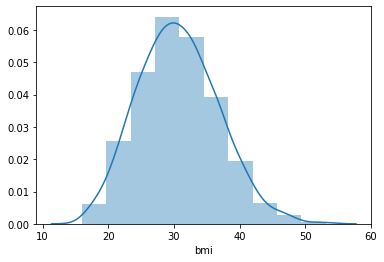

In [14]:
sns.distplot(df['bmi'],bins=10)

- BMI seems to be normlly distributed

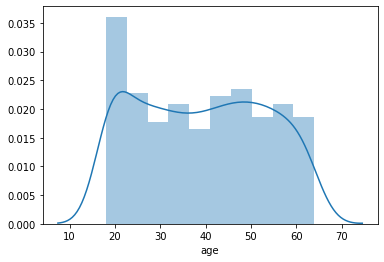

In [15]:
sns.distplot(df['age'], bins=10)

-Age seems to be almost uniformly distributed

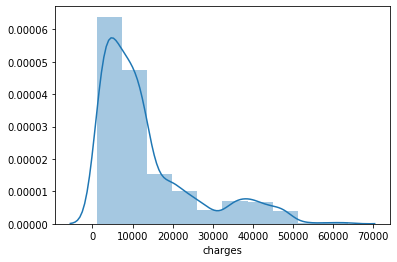

In [16]:
sns.distplot(df['charges'], bins=10) # Distribution is right skewed

- Charges are highly skewed 

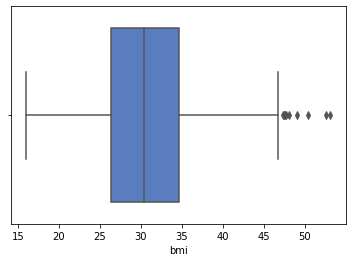

In [25]:
sns.boxplot('bmi', data=df, palette='muted') 
#bmi is normaly distributed with few high outliers/values

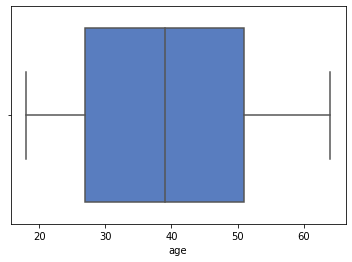

In [26]:
sns.boxplot('age', data=df, palette='muted') 
#No skew in age column

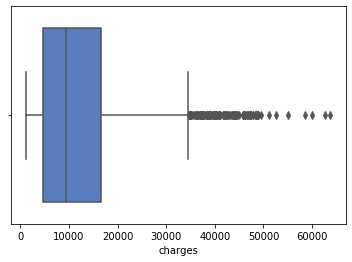

In [27]:
sns.boxplot('charges', data=df, palette='muted') 
#charges column is right skewed with many high outliers/values

# Distribution of categorical columns (include children)

Text(0.5, 1.0, 'Distribution plot')

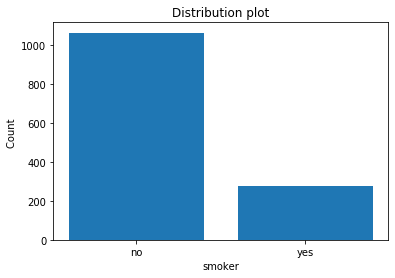

In [47]:
x = df.smoker.value_counts().index 
y = [df['smoker'].value_counts()[i] for i in x]

plt.bar(x,y)
plt.xlabel('smoker')
plt.ylabel('Count')
plt.title('Distribution plot')
plt.show()

-From the above plot we can infer that there are very less smokers

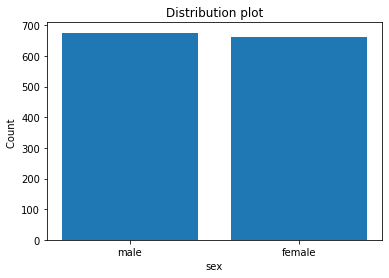

In [50]:
x1 = df.sex.value_counts().index 
y1 = [df['sex'].value_counts()[j] for j in x1]

plt.bar(x1,y1)
plt.xlabel('sex')
plt.ylabel('Count ')
plt.title('Distribution plot')
plt.show()

- From the above plot we can infer that male-female ratio is almost same

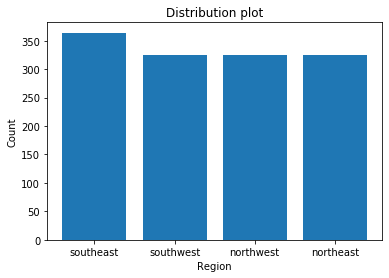

In [53]:
x2 = df.region.value_counts().index 
y2 = [df['region'].value_counts()[k] for k in x2]

plt.bar(x2,y2)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution plot')
plt.show()

- From the above plot we can infer that south east has bit more volume as compared to other regions

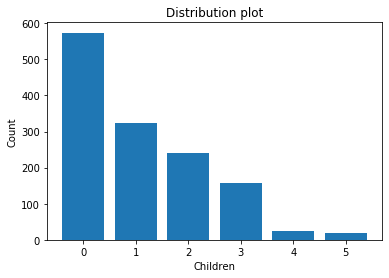

In [54]:
x3 = df.children.value_counts().index 
y3 = [df['children'].value_counts()[l] for l in x3]

plt.bar(x3,y3)
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Distribution plot')
plt.show()

- From the above plot we can infer that majority of people does not have a child and very few have 4 or 5 children

### As pair plot only cosider numeric features so first we have to convert categorical/string features into numeric and for that we have to do label encoding before going for pair plot

In [11]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


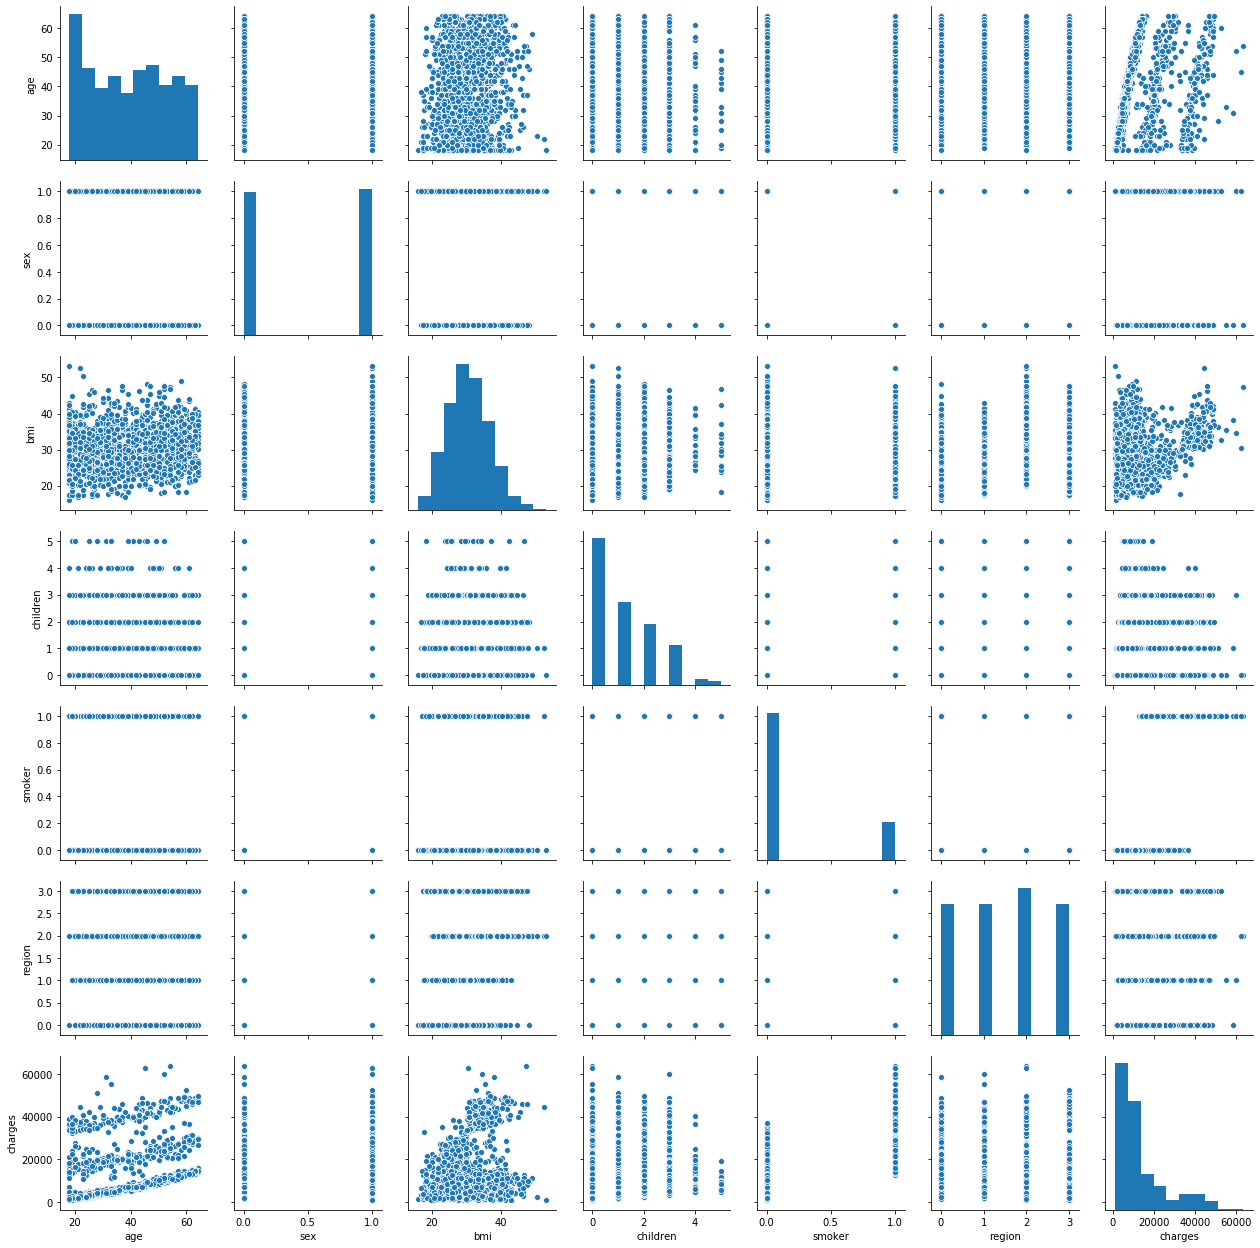

In [84]:
sns.pairplot(df)

### From the above pair plot we can infer below points-
#### 1. Charges increase as age increases.
#### 2. Smoker tends to spend more as compared to non smokers

## Do charges of people who smoke differ significantly from the people who don't?

In [14]:
df1=pd.read_csv("insurance.csv")

In [88]:
x = np.array(df1[df1.smoker == 'yes'].charges)
y = np.array(df1[df1.smoker == 'no'].charges)

stats.ttest_ind(x,y, axis = 0)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

- As p_value <0.05 we reject the null hypothesis and accept the alternate hypothesis.
- Hence Smoker tends to spend more as compared to non smokers

## Does bmi of males differ significantly from that of females?

In [90]:
x = np.array(df1[df1.sex == 'male'].bmi)
y = np.array(df1[df1.sex == 'female'].bmi)

stats.ttest_ind(x,y, axis = 0)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

- As p_value >0.05 we accept the null hypothesis. Hence bmi of males does not differ significantly from that of females.

## Is the proportion of smokers significantly different in different genders

In [15]:
crosstab = pd.crosstab(df1['sex'],df1['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)
crosstab

0.006548143503580696


smoker,no,yes
sex,,
female,547,115
male,517,159


- Hence we can infer that proportion of smokers significantly different in different genders

## Is the distribution of bmi across women with no children, one child and two children, the same

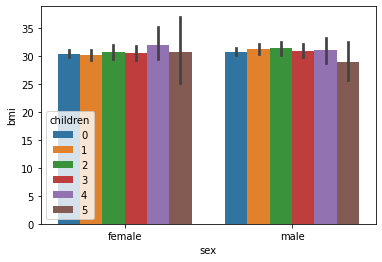

In [25]:
sns.barplot(x=df1['sex'], y=df1['bmi'], hue=df1['children'])

- observation- From the above graph we can clearly infer that the distribution of bmi across women with no children, one child and two children does not have significant change and its almost similar.